In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#to be use in image merging
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
dir="/content/drive/MyDrive/COE - 005 (G9)/best_img/"

In [ ]:
#create function for hyphenator 
def hyphenate(word):
    consonant="qwrtypsdfghjklzxcvbnm"
    vowels="aeiou"
    sylla=[]
    word = word.lower()
    i = len(word)       
    sy=""
    ii=0
    c=0
    for letter in word:

        if letter =="e":
            letter="i"
            
        if letter =="o":
            letter ="u"
            
        if letter =="c":
            letter="k"

        if letter =="z":
            letter="s"
            
        if letter =="f":
            letter="p"
            
        sy=sy+letter

        if letter in vowels and i!=len(word):
            sylla.append(sy) 
            sy=""
            i=i-2            
            c=0
            
        elif letter in vowels:
            sylla.append(sy)
            sy=""
            i=i-1            
            c=0
            
        if letter in consonant:
            c= c+1
    
            if c==1 and ii==len(word)-1:
                sylla.append(sy)
                sy=""
                c=0
           
            if c==2 and ii==len(word)-1:
                    sylla.append(sy)
                    sy=""
                    c=0
                    
            if ii !=len(word)-1 and word[ii+1] in consonant and word[ii+1] !="g":
                sylla.append(sy)
                sy=""
                c=0
                
        ii=ii+1

    return(sylla)

In [ ]:
#dictionary of directory per syllable
baybay={"a": str(dir+"best_a.png"),"i":str(dir+"best_i.png"),"u":str(dir+"best_u.png"),
        "ka":str(dir+"best_ka.png"),"ga":str(dir+"best_ga.png"),"nga":str(dir+"best_nga.png"),"ta":str(dir+"best_ta.png"),
        "da":str(dir+"best_da.png"),"na":str(dir+"best_na.png"),"pa":str(dir+"best_pa.png"),"ba":str(dir+"best_ba.png"),
        "ma":str(dir+"best_ma.png"),"ya":str(dir+"best_ya.png"),"ra":str(dir+"best_ra.png"),"la":str(dir+"best_la.png"),
        "wa":str(dir+"best_wa.png"),"sa":str(dir+"best_sa.png"),"ha":str(dir+"best_ha.png"),"k":str(dir+"best_k.png"),
        "g":str(dir+"best_g.png"),"ng":str(dir+"best_ng.png"),"t":str(dir+"best_t.png"),"d":str(dir+"best_d.png"),
        "n":str(dir+"best_n.png"),"p":str(dir+"best_p.png"),"b":str(dir+"best_b.png"),"m":str(dir+"best_m.png"),
        "y":str(dir+"best_y.png"),"r":str(dir+"best_r.png"),"l":str(dir+"best_l.png"),"w":str(dir+"best_w.png"),
        "s":str(dir+"best_s.png"),"h":str(dir+"best_h.png"),"ki":str(dir+"best_ki.png"),"gi":str(dir+"not_best_gi.png"),
        "ngi":str(dir+"best_ngi.png"),"ti":str(dir+"best_ti.png"),"di":str(dir+"best_di.png"),"ni":str(dir+"best_ni.png"),
        "pi":str(dir+"best_pi.png"),"bi":str(dir+"best_bi.png"),"mi":str(dir+"best_mi.png"),"yi":str(dir+"best_yi.png"),
        "ri":str(dir+"best_ri.png"),"li":str(dir+"best_li.png"),"wi":str(dir+"best_wi.png"),"si":str(dir+"best_si.png"),
        "hi":str(dir+"best_hi.png"),"ku":str(dir+"best_ku.png"),"gu":str(dir+"best_gu.png"),"ngu":str(dir+"best_ngu.png"),
        "tu":str(dir+"best_tu.png"),"du":str(dir+"best_du.png"),"nu":str(dir+"best_nu.png"),"pu":str(dir+"best_pu.png"),
        "bu":str(dir+"best_bu.png"),"mu":str(dir+"best_mu.png"),"yu":str(dir+"best_yu.png"),"ru":str(dir+"best_ru.png"),
        "lu":str(dir+"best_lu.png"),"wu":str(dir+"best_wu.png"),"su":str(dir+"best_su.png"),"hu":str(dir+"best_hu.png"),
        }

input a word: halaman
['ha', 'la', 'ma', 'n']
['/content/drive/MyDrive/COE - 005 (G9)/best_img/best_ha.png', '/content/drive/MyDrive/COE - 005 (G9)/best_img/best_la.png', '/content/drive/MyDrive/COE - 005 (G9)/best_img/best_ma.png', '/content/drive/MyDrive/COE - 005 (G9)/best_img/best_n.png']


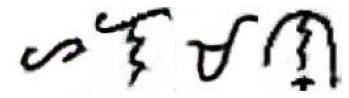

input a word: rifareal
['ri', 'pa', 'ri', 'a', 'l']
['/content/drive/MyDrive/COE - 005 (G9)/best_img/best_ri.png', '/content/drive/MyDrive/COE - 005 (G9)/best_img/best_pa.png', '/content/drive/MyDrive/COE - 005 (G9)/best_img/best_ri.png', '/content/drive/MyDrive/COE - 005 (G9)/best_img/best_a.png', '/content/drive/MyDrive/COE - 005 (G9)/best_img/best_l.png']


FileNotFoundError: ignored

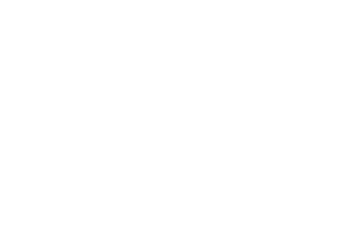

In [ ]:
#storage for the directories
baybayimage=[]
while True:
    plt. axis('off')
    word=input("input a word: ")
    if word=="*stop*":
      print("Thank you for using our transliterator")
      break
    hyp_word=hyphenate(word)
    print(hyp_word)
    
    for element in hyp_word:
        baybayimage.append(baybay[element])
    print(baybayimage)

    images = [Image.open(x) for x in baybayimage]
    total_width = 0
    max_height = 0
    # find the width and height of the final image
    for img in images:
        total_width += img.size[0]
        max_height = max(max_height, img.size[1])

    # create a new image with the appropriate height and width

    new_img = Image.new('RGB', (total_width, max_height))
    # Write the contents of the new image

    current_width = 0

    #defining sites
    for img in images:
      new_img.paste(img, (current_width,0))
      current_width += img.size[0]

    # Save the image
    new_img.save('output.jpg')

    #display
    img = mpimg.imread('output.jpg')
    imgplot = plt.imshow(img)
    plt.show()
    plt.close("all")

    #clearing the used variable

    baybayimage=[]